# Classification of handwritten digits using MLN


# MNIST Dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" title="MNIST dataset" align="center"/>



# Problem
Classify handwritten digits from 0 - 9. <br>
Each image is 28x28 pixels

<img src="https://corochann.com/wp-content/uploads/2017/02/mnist_plot.png" title="" align="center"/>


# Understanding the data

In [28]:
# MNIST data is present in the keras library. You may load it from there
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(train_samples, train_labels), (test_samples, test_labels) = mnist.load_data()
# Training samples 

### Shape of Data

In [29]:
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Range of Values

In [30]:
import numpy as np
np.amax(train_samples) # Max value

255

In [31]:
np.amin(train_samples) # Min Value

0

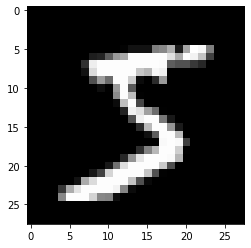

Label of image is 5


In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

pixels = train_samples[0] # Shape (28, 28)
plt.imshow(pixels, cmap='gray')
plt.show()
print('Label of image is', train_labels[0])

# Data Preparation

### Normalize inputs to (0, 1)

In [33]:
# Convert data type from uint8 to float32
train_samples = train_samples.astype('float32')
test_samples = test_samples.astype('float32')

In [34]:
# Normalize inputs to (0,1)
train_samples = train_samples/255.
test_samples = test_samples/255.
np.amax(train_samples) # max value has become 1.0
print(train_samples.shape)

(60000, 28, 28)


In [35]:
## Reshape input to be a column vector
train_samples = train_samples.reshape(train_samples.shape[0], 28*28)
print(train_samples.shape)
test_samples = test_samples.reshape(test_samples.shape[0], 28*28)

(60000, 784)


### Convert outputs to 1-hot vectors
\begin{equation*}
Eg: 5 \rightarrow [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
\end{equation*}

In [36]:
# keras has a utility function for this
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# example
train_labels[0] # label = 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Network Architecture

<img src="https://drive.google.com/uc?id=1m2jgscTgKlvtzj757I9YMJE2sqNXmMMy" title="" align="center" width="50%" height="50%"/>

### Softmax Activation Function
In the Dense (Fully Connected) layer, we use a softmax activation function
\begin{align}
\sigma(x_j) = \frac{e^{x_j}}{\sum_{i}e^{x_i}}
\end{align}

 The softmax function is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities

In [37]:
# Layer definitions
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape = train_samples.shape[1:])
hidden_layer = Dense(512, activation = 'sigmoid',)(input_layer)
output_layer = Dense(10, activation = 'softmax')(hidden_layer)



Loss is Categorical Crossentropy

\begin{align}
L(t,p) = -\sum_{x}t(x)log(p(x))
\end{align}

where  𝑥  ranges over the elements of the output vector

\begin{align}
t \rightarrow \text{true probability distribution} \\
p \rightarrow \text{predicted probability distribution}
\end{align}
In our case, $t$ is always a delta function. 
For eg., for label = 5,<br>
$t(x) = 1$ if $x = 5$ and 0 otherwise

Weight update Rule

\begin{align}
W' \leftarrow W - \eta\frac{\partial L}{\partial W}
\end{align}

In [38]:
# Model definition
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
model = Model(inputs=[input_layer], outputs=[output_layer])
model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=100, batch_size=200)
# Use 10% of samples for validation, validation_split is the relevant parameter

Epoch 1/100
270/270 [==============================] - 1s 3ms/step - loss: 0.8944 - accuracy: 0.7701 - val_loss: 0.2600 - val_accuracy: 0.9273
Epoch 2/100
270/270 [==============================] - 1s 3ms/step - loss: 0.2936 - accuracy: 0.9168 - val_loss: 0.2086 - val_accuracy: 0.9415
Epoch 3/100
270/270 [==============================] - 1s 3ms/step - loss: 0.2440 - accuracy: 0.9296 - val_loss: 0.1796 - val_accuracy: 0.9522
Epoch 4/100
270/270 [==============================] - 1s 3ms/step - loss: 0.2106 - accuracy: 0.9378 - val_loss: 0.1537 - val_accuracy: 0.9582
Epoch 5/100
270/270 [==============================] - 1s 3ms/step - loss: 0.1759 - accuracy: 0.9489 - val_loss: 0.1347 - val_accuracy: 0.9645
Epoch 6/100
270/270 [==============================] - 1s 3ms/step - loss: 0.1445 - accuracy: 0.9574 - val_loss: 0.1228 - val_accuracy: 0.9657
Epoch 7/100
270/270 [==============================] - 1s 3ms/step - loss: 0.1260 - accuracy: 0.9633 - val_loss: 0.1139 - val_accuracy: 0.9688

In [40]:
from sklearn.metrics import confusion_matrix
loss, accuracy = model.evaluate(test_samples, test_labels,verbose=0)  # Evaluate the model
print('Accuracy :%0.3f'%accuracy)

pred_labels = model.predict(test_samples)
cm = confusion_matrix(test_labels.argmax(axis=1), pred_labels.argmax(axis=1))
print(cm )



Accuracy :0.983
[[ 972    0    1    1    1    1    2    1    1    0]
 [   0 1125    3    0    0    1    2    1    3    0]
 [   3    1 1012    3    1    0    3    5    4    0]
 [   0    0    2  993    0    5    0    4    4    2]
 [   2    0    0    1  963    0    5    2    1    8]
 [   2    0    0    8    0  873    4    0    4    1]
 [   5    2    2    1    1    5  942    0    0    0]
 [   1    3    5    3    1    0    0 1010    2    3]
 [   3    0    1    3    4    4    1    3  951    4]
 [   1    2    0    5    6    3    0    4    1  987]]


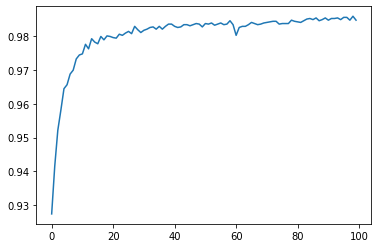

In [44]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.show()